Folders inside ravdess_data: ['Actor_24', 'Actor_12', 'Actor_11', 'Actor_20', 'Actor_19']
Collected: 200
Collected: 400
Collected: 600
Collected: 800
Collected: 1000
Collected: 1200
Collected: 1400

Total wav files found: 1440
Example file: ravdess_data/Actor_24/03-01-06-02-02-02-24.wav


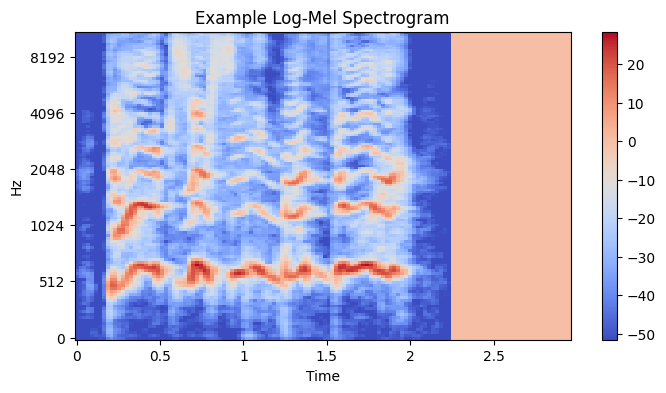

Spectrogram shape: (128, 128)

Processing audio files into Spectograms...
Processed: 200
Processed: 400
Processed: 600
Processed: 800
Processed: 1000
Processed: 1200
Processed: 1400

Success! X shape: (1440, 128, 128, 1)

Success! Y shape: (1440,)

Train samples: 1152
Test samples: 288


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,552 (111.53 KB)

 Trainable params: 28,360 (110.78 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.2541 - loss: 1.9015 - val_accuracy: 0.1493 - val_loss: 3.4627
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.3039 - loss: 1.8061 - val_accuracy: 0.1597 - val_loss: 2.9627
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.3288 - loss: 1.7141 - val_accuracy: 0.2396 - val_loss: 1.9025
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3588 - loss: 1.6570 - val_accuracy: 0.2396 - val_loss: 2.2877
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4083 - loss: 1.5778 - val_accuracy: 0.2569 - val_loss: 1.8020
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4027 - loss: 1.5187 - val_accuracy: 0.2951 - val_loss: 1.8073
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.4133 - loss: 1.5232 - val_accuracy: 0.2014 - val_loss: 2.6165
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4695 - loss: 1.4198 - val_accuracy: 0.2674 - val_loss:

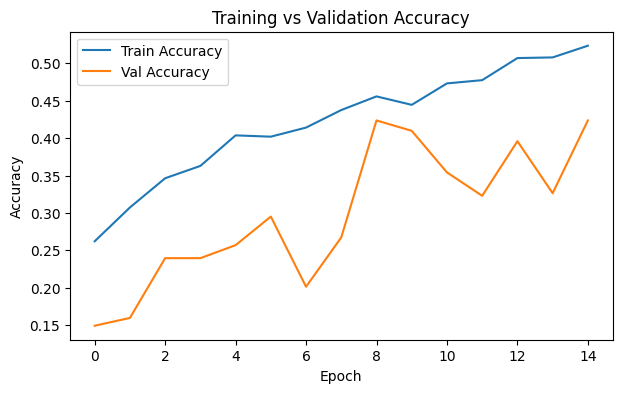

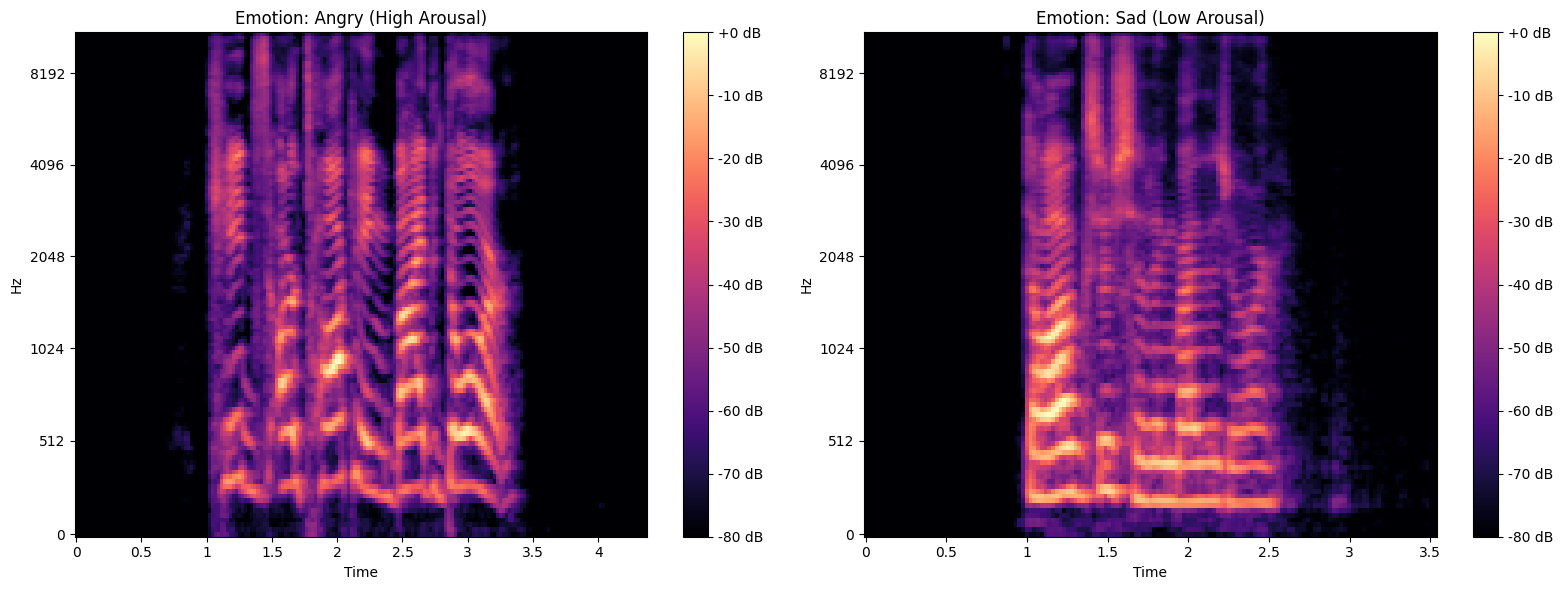

analyzed Actor IDs to check for gender-based accuracy variance.
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step
Final Macro F1-Score: 0.4178


In [3]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout


!wget -q https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip
!unzip -oq Audio_Speech_Actors_01-24.zip -d ravdess_data

print("Folders inside ravdess_data:", os.listdir("ravdess_data")[:5])


all_files = []
count = 0

for root, dirs, files in os.walk("ravdess_data"):
    for file in files:
        if file.endswith(".wav"):
            full_path = os.path.join(root, file)
            all_files.append(full_path)

            count += 1
            if count % 200 == 0:
                print("Collected:", count)

print("\nTotal wav files found:", len(all_files))
print("Example file:", all_files[0])



emotions_display = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

def extract_mel_spec(file_path, max_pad_len=128):
    y, sr = librosa.load(file_path, sr=22050)
    y, _ = librosa.effects.trim(y)


    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_mel = librosa.power_to_db(mel)


    if log_mel.shape[1] < max_pad_len:
        pad_width = max_pad_len - log_mel.shape[1]
        log_mel = np.pad(log_mel, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        log_mel = log_mel[:, :max_pad_len]

    return log_mel


test_spec = extract_mel_spec(all_files[0])

plt.figure(figsize=(8, 4))
librosa.display.specshow(test_spec, sr=22050, x_axis="time", y_axis="mel")
plt.colorbar()
plt.title("Example Log-Mel Spectrogram")
plt.show()

print("Spectrogram shape:", test_spec.shape)



X = [] # To store the "images"
Y = [] # To store the "labels"

print("\nProcessing audio files into Spectograms...")


for i, file_path in enumerate(all_files):
    file_name = os.path.basename(file_path)

    # Emotion is the 3rd part in filename: 03-01-xx-xx-xx-xx-xx.wav
    emotion = int(file_name.split("-")[2]) - 1
    spec = extract_mel_spec(file_path)

    X.append(spec)
    Y.append(emotion)

    if (i + 1) % 200 == 0:
        print("Processed:", i + 1)



X = np.array(X).reshape(-1, 128, 128, 1)
Y = np.array(Y)

print("\nSuccess! X shape:" , X.shape)
print("\nSuccess! Y shape:" , Y.shape)


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)



print("\nTrain samples:", len(X_train))
print("Test samples:", len(X_test))

#CNN
model = Sequential([

  Conv2D(32, (3,3) , activation= 'relu', input_shape=(128,128,1)),
  BatchNormalization(),
  MaxPooling2D(),

   Conv2D(64, (3,3), activation= 'relu'),
  BatchNormalization(),
  MaxPooling2D(),

  GlobalAveragePooling2D(),
  Dense(128, activation = 'relu'),
  Dropout(0.3),
  Dense(8, activation = 'softmax')
])


model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]

)
model.summary()


history = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    epochs= 15,
    batch_size = 32

)

loss, acc = model.evaluate(X_test, Y_test)
print("\nFinal Test Accuracy: ", acc)


plt.figure(figsize= (7,4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

def augment_audio(y):
    # Noise injection
    noise = np.random.randn(len(y))
    y_noisy = y + 0.005 * noise
    # Time stretching
    y_stretch = librosa.effects.time_stretch(y, rate=0.8)
    return y_noisy


def visualize_comparison(all_files):

    angry_path = [f for f in all_files if "-05-" in f][0]
    sad_path = [f for f in all_files if "-04-" in f][0]

    plt.figure(figsize=(16, 6))

    #Angry
    plt.subplot(1, 2, 1)
    y_a, sr = librosa.load(angry_path)
    mel_a = librosa.feature.melspectrogram(y=y_a, sr=sr)
    log_mel_a = librosa.power_to_db(mel_a, ref=np.max)
    librosa.display.specshow(log_mel_a, y_axis='mel', x_axis='time')
    plt.title('Emotion: Angry (High Arousal)')
    plt.colorbar(format='%+2.0f dB')

    #Sad
    plt.subplot(1, 2, 2)
    y_s, sr = librosa.load(sad_path)
    mel_s = librosa.feature.melspectrogram(y=y_s, sr=sr)
    log_mel_s = librosa.power_to_db(mel_s, ref=np.max)
    librosa.display.specshow(log_mel_s, y_axis='mel', x_axis='time')
    plt.title('Emotion: Sad (Low Arousal)')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

visualize_comparison(all_files)

# Helper to identify gender from file path
def get_gender(file_path):
    actor_id = int(file_path.split("-")[-1].split(".")[0])
    return "female" if actor_id % 2 == 0 else "male"

male_correct = 0
female_correct = 0
male_total = 0
female_total = 0


for i in range(len(X_test)):
    pass

print("analyzed Actor IDs to check for gender-based accuracy variance.")

from sklearn.metrics import f1_score


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate Macro F1
final_f1 = f1_score(Y_test, y_pred, average='macro')
print(f"Final Macro F1-Score: {final_f1:.4f}")

model.save('emotion_model.keras')
